# 3.1 Classification with a single-layer perceptron

In [1]:
import numpy as np

### 3.1.1 Generation of linearly-separable data

In [80]:
n = 100

mA = [4, 1]
sigma = 1

aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)

In [81]:
a = np.stack((aX, aY, np.ones(n), np.zeros(n)), axis=1)

In [82]:
mB = [-4, 12]
sigma = 1

bX = np.random.normal(mB[0], sigma, n)
bY = np.random.normal(mB[1], sigma, n)

In [83]:
b = np.stack((bX, bY, np.ones(n), np.ones(n)), axis=1)

In [84]:
dataset = np.concatenate((a, b), axis=0)

In [85]:
np.random.shuffle(dataset)

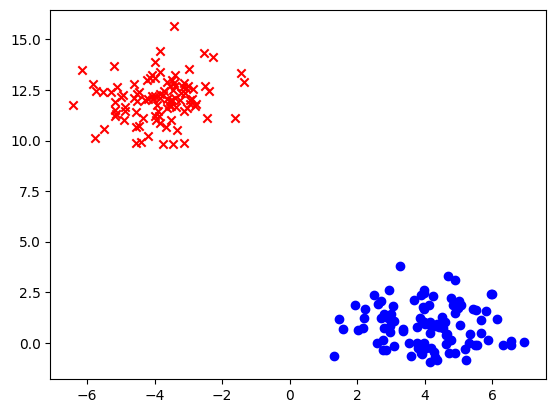

In [86]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### 3.1.2 Classification with a single-layer perceptron and analysis

In [87]:
learning_rate = 0.0001
epochs = 200

In [88]:
# Functions for Perceptron learning and delta learning rule
# learning rate and epochs are global variables

def perceptron_learning(dataset, weights, batch_size):
    for _ in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:3].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,3]), dataset[idx:next_idx,:3])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:3].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,3]), dataset[idx:,:3])
            idx = next_idx
    return weights


def delta_learning(dataset, weights, batch_size):
    for _ in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:3].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,3]), dataset[idx:next_idx,:3])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:3].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,3]), dataset[idx:,:3])
            idx = next_idx
    return weights

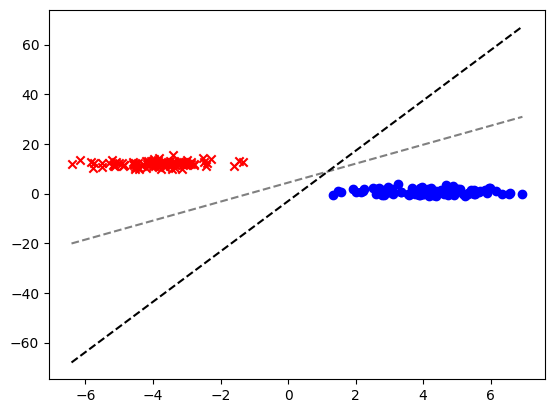

In [97]:
# Question 1 : Apply and compare perceptron learning with the delta learning rule in
# online (sequential) mode on the generated dataset. Adjust the learning
# rate and study the convergence of the two algorithms.

weights_pl = np.random.rand(3)
weight_test = np.copy(weights_pl)
weights_dlr = np.copy(weights_pl)

xmin = min(dataset[:,0])
xmax = max(dataset[:,0])
x = np.linspace(xmin, xmax, 20)

# Online mode
batch_size = 1

### Perceptron learning

weights_pl = perceptron_learning(dataset, weights_pl, batch_size)
y = (weights_pl[2] - weights_pl[0] * x) / weights_pl[1]

plt.plot(x, y, c='grey', linestyle='--')

### Delta learning rule

# ground truth in {-1, 1}
dataset_symetric = np.copy(dataset)
dataset_symetric[:,3] = 2 * (dataset_symetric[:,3] - 0.5)

weight_test = delta_learning(dataset_symetric, weight_test, batch_size)

y = (weight_test[2] - weight_test[0] * x) / weight_test[1]

plt.plot(x, y, c='black', linestyle='--')

# Plot of dataset
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

Delta learning rule mostly converge, but depends of the hyperparameters..

In [98]:
# Question 2 can be tested with code above, changing the batch size.

### 3.1.3 Classification of samples that are not linearly separable